# Looping
We consider the work done on a massive object moving in a looping (i.e. in a vertical circle). The gravitational force always points vertically downwards while the direction of motion changes continuously.

The idea of this exercise is to approximate the circle as a polygon, and to calculate the work for each of the edges of the polygon.

In [57]:
import numpy as np
import matplotlib.pyplot as plt

#### Define work function

In [58]:
def work(F, ds):
    '''
    Calculate the work done by force F over displacement ds.
    The work corresponds to the dot product of F and ds.
    '''
    
    return np.dot(F, ds)

#### Verify work function
To verify if the work function works as expected, we apply it to the following situations where a force of 2 N acts on an object displaced by 3 m:
- Both the force and the object in the positive $x$ direction.
- The force acts in the positive $y$ direction, and the object is displaced in the negative $y$ direction.
- The force acts in the positive $x$ direction, and the object is displaced in the positive $y$ direction.
- The force acts in the positive $x$ direction, and the object is displaced along the angle bisector between the $x$ and $y$ axis.

In [59]:
# Case 1
F = np.array([2, 0]) # force along positive x axis
ds = np.array([3, 0]) # displacement along positive x axis
print(f'Case 1: W = {work(F, ds)} N')

# Case 2
F = np.array([0, 2]) # force along positive y axis
ds = np.array([0, -3]) # displacement along negative y axis
print(f'Case 2: W = {work(F, ds)} N')

# Case 3
F = np.array([2, 0]) # force along positive x axis
ds = np.array([0, 3]) # displacement along positive y axis
print(f'Case 3: W = {work(F, ds)} N')

# Case 1
F = np.array([2, 0]) # force along positive x axis
ds = np.array([3, 3])/np.sqrt(2) # displacement along angle bisector
print(f'Case 3: W = {work(F, ds):.2f} N')

Case 1: W = 6 N
Case 2: W = -6 N
Case 3: W = 0 N
Case 3: W = 4.24 N


#### Define points on circle
We choose $n$ points on a circle with radius 5 m. We divide the full circle in the right (way up) and left (way down) semicircle.

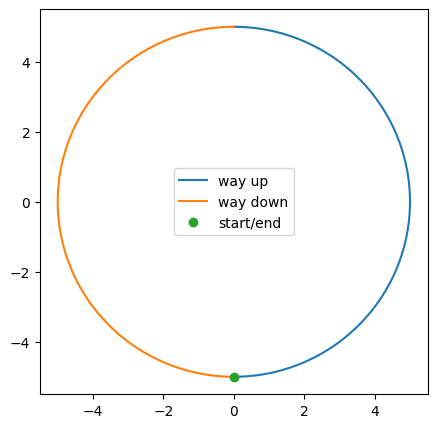

In [103]:
n = 100 # number of points per semicircle
r = 5 # radius of circle

# calculate n angles in range [0, 2π]
angles_up = [np.pi / n * i for i in range(n + 1)]
angles_down = [np.pi / n * i for i in range(n, 2 * n + 1)]

# calculate x and y coordinates
x_up = r * np.sin(angles_up)
y_up = - r * np.cos(angles_up)

x_down = r * np.sin(angles_down)
y_down = - r * np.cos(angles_down)

# plot y vs x
plt.figure(figsize=(5, 5))
plt.plot(x_up, y_up, label='way up')
plt.plot(x_down, y_down, label='way down')
plt.plot(x_up[0], y_up[0], 'o', label='start/end')
plt.legend()
plt.show()

# combine x and y to an array of 2d vectors
points_up = np.stack([x_up, y_up], axis=1)
points_down = np.stack([x_down, y_down], axis=1)

# calculate displacements
ds_up = np.diff(points_up, axis=0)
ds_down = np.diff(points_down, axis=0)

#### Define force and calculate work
We assume a force of 750 N pointing downwards (negative $y$ axis).

In [104]:
F = np.array([0, -750])

# right semicircle
# "wrong order" required to allow for broadcasting 
# of dimension (N x 2) onto dimension 2
dW_up = np.dot(ds_up, F) 
W_up = np.sum(dW_up)

# left semicircle
dW_down = np.dot(ds_down, F) 
W_down = np.sum(dW_down)

print(f'work on way up:   W_up   = {W_up:.0f} J')
print(f'work on way down: W_down =  {W_down:.0f} J')

work on way up:   W_up   = -7500 J
work on way down: W_down =  7500 J


#### Interpretation
It is clear that the work on the way up has the same magnitude as the work on the way down. The former has a negative sign since gravitation acts against the displacement. We can also say that work has to be done against the gravitational force. The latter has a positive sign, i.e. the gravitational force does work on the object.

It should also be evident that the result is just the product of the force and the height of the circle, i.e. 750 N · 10 m. The path from the lowest to the highest point does not affect the work done by the gravitational force. This is a characteristic property of so-called *conservative fields*.